<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240219/new_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Signal Smoothing - Gaussian


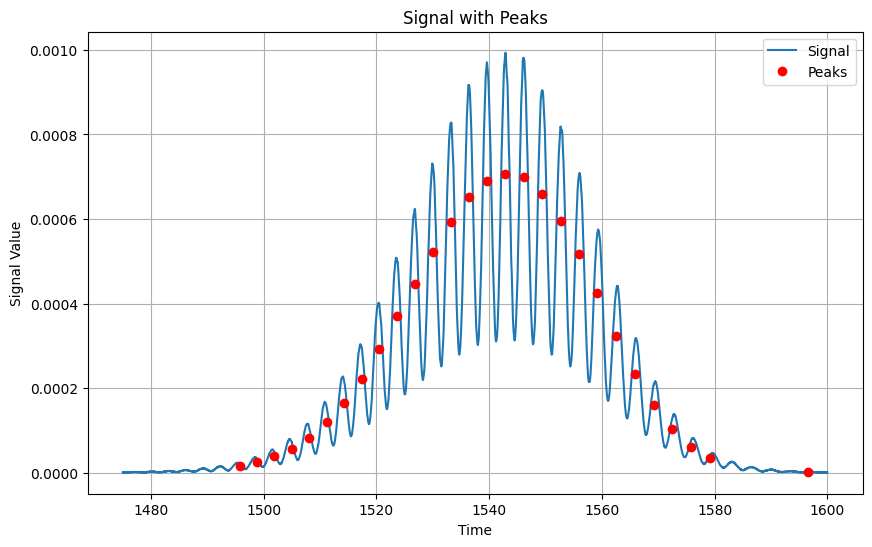

In [ ]:
from scipy.ndimage import gaussian_filter

smoothed_signal = gaussian_filter(df['Y'], sigma=50)
peaks, _ = find_peaks(smoothed_signal)

peak_values = smoothed_signal[peaks]
peak_times = df['X'][peaks]

plt.figure(figsize=(10, 6))
plt.plot(df['X'], df['Y'], label='Signal')
plt.plot(peak_times, peak_values, 'ro', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Signal with Peaks')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import csv
from scipy.ndimage import gaussian_filter
import os

base_directory = '/content/drive/MyDrive/Refractive_Index_Measurements_New/1stSeries_07.05.21'

all_csv_X = []
all_csv_Y = []

for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith('.CSV') and file != 'REF.CSV':
            file_path = os.path.join(root, file)

            with open(file_path, 'rt') as f:
                reader = csv.reader(f)
                csv_content = [raw for raw in reader]
            f.close()
            df = pd.DataFrame(csv_content)[24:].reset_index(drop=True)
            df = df.astype(float)
            df.columns = ['X', 'Y']
            Y = float(os.path.basename(root))
            all_csv_X.append(df)
            all_csv_Y.append(Y)


# **classification - 5 label**

In [ ]:
Y = pd.DataFrame(all_csv_Y, columns=['Y'])
df_Y = pd.DataFrame(all_csv_Y, columns=['Y'])
len(Y)
for i in range(len(df_Y['Y'])):
    if df_Y['Y'][i] < 1.30:
        df_Y['Y'][i] = 'Normal_tissue'
    elif df_Y['Y'][i] >= 1.30 and df_Y['Y'][i] <=1.32:
      df_Y['Y'][i] = 'CIN_1'
    elif df_Y['Y'][i] >= 1.33 and df_Y['Y'][i] <1.38:
      df_Y['Y'][i] = 'CIN_2'
    elif df_Y['Y'][i] >= 1.38 and df_Y['Y'][i] <=1.39:
      df_Y['Y'][i] = 'CIN_3'
    else:
      df_Y['Y'][i] = 'Cervical_Cancer'
print(Y)
print(df_Y)

        Y
0    1.31
1    1.31
2    1.31
3    1.31
4    1.31
..    ...
226  1.42
227  1.42
228  1.42
229  1.42
230  1.42

[231 rows x 1 columns]
                   Y
0              CIN_1
1              CIN_1
2              CIN_1
3              CIN_1
4              CIN_1
..               ...
226  Cervical_Cancer
227  Cervical_Cancer
228  Cervical_Cancer
229  Cervical_Cancer
230  Cervical_Cancer

[231 rows x 1 columns]


# **classification - 2 label**

In [ ]:
Y = pd.DataFrame(all_csv_Y, columns=['Y'])
df_Y = pd.DataFrame(all_csv_Y, columns=['Y'])
len(Y)
for i in range(len(df_Y['Y'])):
    if df_Y['Y'][i] < 1.30:
        df_Y['Y'][i] = 'Normal_tissue'
    else:
      df_Y['Y'][i] = 'Cancer'
print(Y)
print(df_Y)

# **features Calculation**

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks

analysis_values = []
for df, label in zip(all_csv_X, all_csv_Y):
    smoothed_signal = gaussian_filter(df['Y'], sigma=50)
    peaks, _ = find_peaks(smoothed_signal)

    peak_values = df['Y'][peaks].reset_index(drop=True)
    peak_times = df['X'][peaks].reset_index(drop=True)

    time_diff = np.diff(peak_times)
    std_signal_peak = np.std(time_diff)
    mean_signal_peak = np.mean(time_diff)
    min_signal_peak = np.min(time_diff)
    analysis_values.append([std_signal_peak, min_signal_peak, mean_signal_peak])

data = pd.DataFrame(analysis_values, columns=['std', 'min', 'mean'])
print(data)

[[0.08184034690696713, 3.075399999999945, 3.2108391304347763], [3.510822995333985, 3.055599999999913, 3.940970833333324], [0.08273365446022019, 3.055599999999913, 3.2099739130434815], [0.07999542496369004, 3.055499999999938, 3.2099739130434815], [0.08190518078206192, 3.055499999999938, 3.2099695652173956], [0.08007119114996476, 3.075399999999945, 3.211699999999995], [3.49914231522841, 3.035799999999881, 3.937666666666663], [0.0840669289579668, 3.035699999999906, 3.2082434782608624], [0.08785156367460722, 3.0157999999998992, 3.208243478260872], [3.482914776485413, 3.055499999999938, 3.936012500000004], [3.4985749357154132, 3.075399999999945, 3.9401458333333323], [0.056687835231791966, 2.9365999999999985, 3.099492857142861], [0.053768517930178984, 2.9564000000000306, 3.100907142857149], [0.05827968850154165, 2.9365999999999985, 3.1009071428571326], [0.05533705119262258, 2.9562999999998283, 3.1009071428571326], [0.05532680136225271, 2.9564000000000306, 3.100907142857149], [0.0611154932926

# **Dataset**

In [ ]:
spectrum_data = pd.concat([data, df_Y], axis=1)
print(spectrum_data)


          std     min      mean                Y
0    0.081840  3.0754  3.210839            CIN_1
1    3.510823  3.0556  3.940971            CIN_1
2    0.082734  3.0556  3.209974            CIN_1
3    0.079995  3.0555  3.209974            CIN_1
4    0.081905  3.0555  3.209970            CIN_1
..        ...     ...       ...              ...
226  0.065103  2.8175  2.914467  Cervical_Cancer
227  0.050467  2.8571  2.925489  Cervical_Cancer
228  0.061652  2.8174  2.914456  Cervical_Cancer
229  0.042073  2.8572  2.936513  Cervical_Cancer
230  0.060625  2.8373  2.916667  Cervical_Cancer

[231 rows x 4 columns]


In [ ]:
from sklearn.model_selection import train_test_split
XX = spectrum_data[['std', 'min', 'mean']]
YY = spectrum_data['Y']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_s = le.fit_transform(YY)

X_train, X_test, y_train, y_test = train_test_split(XX, Y_s, test_size=0.3, train_size=0.7, random_state=123)
print(X_train.shape)
print(y_train.shape)

(161, 3)
(161,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

knn = KNeighborsClassifier(n_neighbors=1)
rf = RandomForestClassifier(n_estimators=100)
svm= SVC(kernel='rbf', C=1.0)

start_knn = time.time()
knn.fit(X_train, y_train)
end_knn = time.time()

start_rf = time.time()
rf.fit(X_train, y_train)
end_rf = time.time()

start_svm = time.time()
svm.fit(X_train, y_train)
end_svm = time.time()


predicted_labels_knn = knn.predict(X_test)
predicted_labels_rf = rf.predict(X_test)
predicted_labels_svm = svm.predict(X_test)

Y_test = le.inverse_transform(y_test)
Y_knn = le.inverse_transform(predicted_labels_knn)
Y_rf = le.inverse_transform(predicted_labels_rf)
Y_svm = le.inverse_transform(predicted_labels_svm)

print(end_knn-start_knn)
print(end_svm-start_svm)
print(end_rf-start_rf)

['CIN_2' 'CIN_1' 'Cervical_Cancer' 'Cervical_Cancer' 'Cervical_Cancer'
 'Cervical_Cancer' 'Cervical_Cancer' 'Cervical_Cancer' 'Cervical_Cancer'
 'CIN_2' 'CIN_3' 'Cervical_Cancer' 'Cervical_Cancer' 'Cervical_Cancer'
 'CIN_3' 'Cervical_Cancer' 'CIN_2' 'Cervical_Cancer' 'CIN_2'
 'Cervical_Cancer' 'CIN_2' 'Cervical_Cancer' 'Cervical_Cancer'
 'Cervical_Cancer' 'Cervical_Cancer' 'Cervical_Cancer' 'CIN_1' 'CIN_3'
 'CIN_2' 'CIN_3' 'CIN_2' 'CIN_2' 'CIN_2' 'Cervical_Cancer'
 'Cervical_Cancer' 'CIN_1' 'CIN_3' 'CIN_2' 'CIN_2' 'Cervical_Cancer'
 'Cervical_Cancer' 'CIN_2' 'CIN_2' 'Cervical_Cancer' 'CIN_3' 'CIN_1'
 'Cervical_Cancer' 'CIN_1' 'Cervical_Cancer' 'Cervical_Cancer' 'CIN_3'
 'CIN_2' 'Cervical_Cancer' 'Cervical_Cancer' 'Cervical_Cancer'
 'Cervical_Cancer' 'CIN_1' 'Cervical_Cancer' 'CIN_2' 'Cervical_Cancer'
 'Cervical_Cancer' 'Cervical_Cancer' 'CIN_2' 'Cervical_Cancer'
 'Cervical_Cancer' 'Cervical_Cancer' 'Cervical_Cancer' 'Cervical_Cancer'
 'CIN_2' 'CIN_1']
0.004022836685180664
0.00323176383

**KNN**

knn_Accuracy: 0.9857142857142858
                 precision    recall  f1-score   support

          CIN_1       1.00      1.00      1.00         7
          CIN_2       1.00      0.94      0.97        17
          CIN_3       0.88      1.00      0.93         7
Cervical_Cancer       1.00      1.00      1.00        39

       accuracy                           0.99        70
      macro avg       0.97      0.99      0.98        70
   weighted avg       0.99      0.99      0.99        70



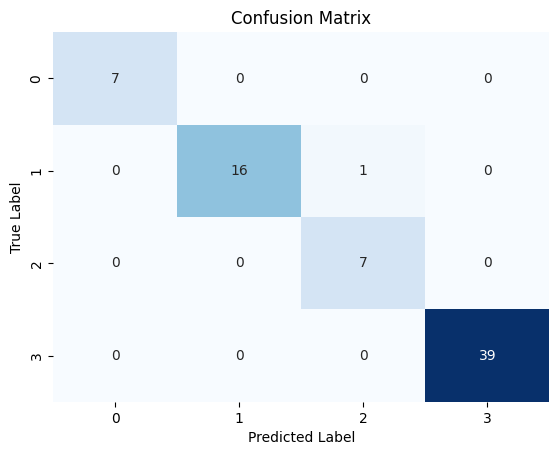

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(Y_test, Y_knn)
print(f"knn_Accuracy: {accuracy_knn}")

cm_knn = confusion_matrix(Y_test, Y_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(Y_test, Y_knn)

print(report)

# Display the plot
plt.show()

**Random Forest**

rf_Accuracy: 0.9857142857142858
                 precision    recall  f1-score   support

          CIN_1       1.00      1.00      1.00         7
          CIN_2       1.00      0.94      0.97        17
          CIN_3       0.88      1.00      0.93         7
Cervical_Cancer       1.00      1.00      1.00        39

       accuracy                           0.99        70
      macro avg       0.97      0.99      0.98        70
   weighted avg       0.99      0.99      0.99        70



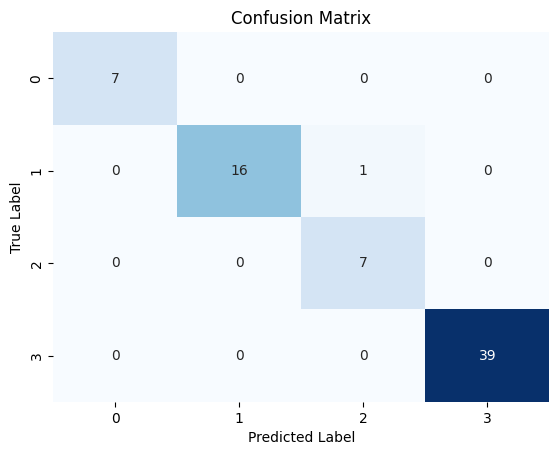

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(Y_test, Y_rf)
print(f"rf_Accuracy: {accuracy_rf}")

cm_rf = confusion_matrix(Y_test, Y_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(Y_test, Y_rf)

print(report)

# Display the plot
plt.show()

**SVM**

svm_Accuracy: 0.8428571428571429
                 precision    recall  f1-score   support

          CIN_1       1.00      0.57      0.73         7
          CIN_2       0.65      1.00      0.79        17
          CIN_3       0.00      0.00      0.00         7
Cervical_Cancer       0.95      0.97      0.96        39

       accuracy                           0.84        70
      macro avg       0.65      0.64      0.62        70
   weighted avg       0.79      0.84      0.80        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


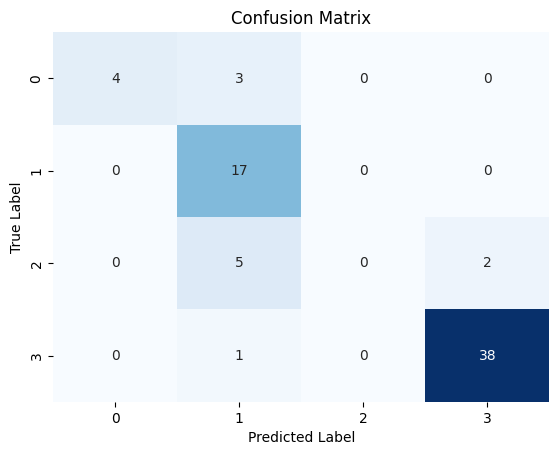

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(Y_test, Y_svm)
print(f"svm_Accuracy: {accuracy_svm}")

cm_svm = confusion_matrix(Y_test, Y_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(Y_test, Y_svm)

print(report)

# Display the plot
plt.show()